<a href="https://colab.research.google.com/github/oreoluwaodeyinka/data_analytics_25/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oreoluwa Odeyinka
Python for Data Analytics Winter 2025

# Project 3

the goal of this project is to analyze nypd arrest data

*   pick any zip code/neighborhood/district in this dataset as an initial
comparison point
* pick a feature/measure/column
compare above entity to any other (different) entity - you only need to do one additional comparison point (but you’re welcome to do more comparisons if you feel compelled to do so)
* the analysis should include some descriptive statistics
* the analysis should include one cleaning task (or more)
* the analysis should include one visualization (or more)
* the analysis should include a brief conclusion statement that
includes a discussion on bias (not more than four sentences)



In [64]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')

The data that I have chosen is the NYPD Arrests Data from NYC Open Data that details arrests made in NYC between 03/15/2020 and 06/15/2020 so that I can understand the kinds of arrests that were being made during the Covid lockdown in NYC.  

In [65]:
#Reading the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/oreoluwaodeyinka/data_analytics_25/refs/heads/main/NYPD_Arrests_Data_(Historic)_20251217.csv')
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,214202306,06/15/2020,244.00,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.00,BURGLARY,PL 1402000,F,M,25,0,<18,M,BLACK,1001562,230531,40.80,-73.94,POINT (-73.93747328799998 40.799421607000056)
1,214196930,06/15/2020,244.00,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.00,BURGLARY,PL 1402501,F,K,83,0,25-44,M,WHITE HISPANIC,1007128,193705,40.70,-73.92,POINT (-73.91749507299994 40.69833089400004)
2,214185449,06/15/2020,105.00,STRANGULATION 1ST,106.00,FELONY ASSAULT,PL 1211200,F,K,79,0,18-24,F,WHITE,998165,190685,40.69,-73.95,POINT (-73.94982513399998 40.69006032400005)
3,214202311,06/15/2020,109.00,"ASSAULT 2,1,UNCLASSIFIED",106.00,FELONY ASSAULT,PL 1200512,F,Q,109,0,25-44,F,ASIAN / PACIFIC ISLANDER,1034110,214113,40.75,-73.82,POINT (-73.82003718699998 40.754234895000025)
4,214206152,06/15/2020,748.00,"CONTEMPT,CRIMINAL",359.00,OFFENSES AGAINST PUBLIC ADMINI,PL 2155006,M,B,47,0,18-24,M,BLACK,1026486,262591,40.89,-73.85,POINT (-73.84725001299995 40.88733281800006)


In [66]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,"31,474.00","31,470.00","31,465.00","31,474.00","31,474.00","31,474.00","31,474.00","31,474.00","31,474.00"
mean,"212,706,025.09",388.31,234.62,62.92,1.13,"1,005,726.56","208,430.68",40.74,-73.92
std,"878,780.39",261.22,136.87,34.82,9.45,"21,528.57","30,452.77",0.08,0.08
min,"211,030,154.00",0.00,101.00,1.00,0.00,"914,321.00","121,131.00",40.50,-74.25
25%,"211,985,145.25",113.00,109.00,40.00,0.00,"992,943.00","185,484.50",40.68,-73.97
50%,"212,768,846.50",339.00,233.00,61.00,0.00,"1,005,312.00","206,647.00",40.73,-73.92
75%,"213,468,390.75",568.00,344.00,100.00,0.00,"1,017,440.00","236,544.00",40.82,-73.88
max,"214,266,789.00",969.00,995.00,123.00,97.00,"1,066,347.00","271,820.00",40.91,-73.70


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31474 entries, 0 to 31473
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ARREST_KEY         31474 non-null  int64  
 1   ARREST_DATE        31474 non-null  object 
 2   PD_CD              31470 non-null  float64
 3   PD_DESC            31465 non-null  object 
 4   KY_CD              31465 non-null  float64
 5   OFNS_DESC          31465 non-null  object 
 6   LAW_CODE           31474 non-null  object 
 7   LAW_CAT_CD         31274 non-null  object 
 8   ARREST_BORO        31474 non-null  object 
 9   ARREST_PRECINCT    31474 non-null  int64  
 10  JURISDICTION_CODE  31474 non-null  int64  
 11  AGE_GROUP          31474 non-null  object 
 12  PERP_SEX           31474 non-null  object 
 13  PERP_RACE          31474 non-null  object 
 14  X_COORD_CD         31474 non-null  int64  
 15  Y_COORD_CD         31474 non-null  int64  
 16  Latitude           314

## Clean The Data

In [68]:
#Clean column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
df.columns

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'lon_lat'],
      dtype='object')

There are some columns that are not necessary so I'm going to go ahead and drop them before any further clean up.

This is each column description

* ARREST_KEY:
Randomly generated persistent ID for each arrest

* ARREST_DATE:
Exact date of arrest for the reported event

* PD_CD:
Three digit internal classification code (more granular than Key Code)

* PD_DESC:
Description of internal classification corresponding with PD code (more granular than Offense Description)

* KY_CD:
Three digit internal classification code (more general category than PD code)

* OFNS_DESC:
Description of internal classification corresponding with KY code (more general category than PD description)

* LAW_CODE:
Law code charges corresponding to the NYS Penal Law, VTL and other various local laws

* LAW_CAT_CD:
Level of offense: felony, misdemeanor, violation

* ARREST_BORO:
Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)

* ARREST_PRECINCT
Precinct where the arrest occurred

* JURISDICTION_CODE:
Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions

* AGE_GROUP:
Perpetrator’s age within a category

* PERP_SEX:
Perpetrator’s sex description

* PERP_RACE:
Perpetrator’s race description

* X_COORD_CD:
Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

* Y_COORD_CD:
Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

* Latitude:
Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

* Longitude:
Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

* Lon_Lat:
Georeferenced Point Column based on Longitude and Latitude fields

In [69]:
#Dropping the unnecessary columns
df.drop(columns=['arrest_key', 'ky_cd', 'law_code', 'x_coord_cd', 'y_coord_cd',
                 'latitude', 'longitude', 'lon_lat'], inplace=True)
print("DataFrame after dropping multiple columns in-place:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31474 entries, 0 to 31473
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arrest_date        31474 non-null  object 
 1   pd_cd              31470 non-null  float64
 2   pd_desc            31465 non-null  object 
 3   ofns_desc          31465 non-null  object 
 4   law_cat_cd         31274 non-null  object 
 5   arrest_boro        31474 non-null  object 
 6   arrest_precinct    31474 non-null  int64  
 7   jurisdiction_code  31474 non-null  int64  
 8   age_group          31474 non-null  object 
 9   perp_sex           31474 non-null  object 
 10  perp_race          31474 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.6+ MB
DataFrame after dropping multiple columns in-place:
 None


Now I have a dataframe with only the data that could be potentially useful for this exploration.

In [70]:
# To count the total number of unique offense descriptions
len(df['ofns_desc'].unique())

57

In [71]:
#Inspecting the column
df['ofns_desc'].unique()

array(['BURGLARY', 'FELONY ASSAULT', 'OFFENSES AGAINST PUBLIC ADMINI',
       'MISCELLANEOUS PENAL LAW', 'CRIMINAL MISCHIEF & RELATED OF',
       'ROBBERY', 'PETIT LARCENY', 'FOR OTHER AUTHORITIES',
       'POSSESSION OF STOLEN PROPERTY', 'ASSAULT 3 & RELATED OFFENSES',
       'INTOXICATED & IMPAIRED DRIVING', 'DANGEROUS WEAPONS',
       'OFF. AGNST PUB ORD SENSBLTY &', 'DANGEROUS DRUGS', 'SEX CRIMES',
       'MURDER & NON-NEGL. MANSLAUGHTE', 'VEHICLE AND TRAFFIC LAWS',
       'UNAUTHORIZED USE OF A VEHICLE', 'CRIMINAL TRESPASS', 'RAPE',
       'FORGERY', 'ENDAN WELFARE INCOMP',
       'GRAND LARCENY OF MOTOR VEHICLE', 'OTHER STATE LAWS (NON PENAL LA',
       'NYS LAWS-UNCLASSIFIED FELONY', 'OFFENSES AGAINST THE PERSON',
       'GRAND LARCENY', 'FRAUDS', 'INTOXICATED/IMPAIRED DRIVING',
       'OFFENSES INVOLVING FRAUD', 'ALCOHOLIC BEVERAGE CONTROL LAW',
       'HARRASSMENT 2', 'OTHER OFFENSES RELATED TO THEF',
       "BURGLAR'S TOOLS", 'OTHER STATE LAWS', 'OTHER TRAFFIC INFRACTION',
  

In [72]:
#using this as a reference for column names
df.columns

Index(['arrest_date', 'pd_cd', 'pd_desc', 'ofns_desc', 'law_cat_cd',
       'arrest_boro', 'arrest_precinct', 'jurisdiction_code', 'age_group',
       'perp_sex', 'perp_race'],
      dtype='object')

In [73]:
#Changing the data types of the columns to categorical

categorical_cols = ['pd_desc', 'ofns_desc', 'law_cat_cd', 'arrest_boro', 'age_group', 'perp_sex', 'perp_race']

for col in categorical_cols:
    df[col] = df[col].astype('category')


#checking to see that it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31474 entries, 0 to 31473
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   arrest_date        31474 non-null  object  
 1   pd_cd              31470 non-null  float64 
 2   pd_desc            31465 non-null  category
 3   ofns_desc          31465 non-null  category
 4   law_cat_cd         31274 non-null  category
 5   arrest_boro        31474 non-null  category
 6   arrest_precinct    31474 non-null  int64   
 7   jurisdiction_code  31474 non-null  int64   
 8   age_group          31474 non-null  category
 9   perp_sex           31474 non-null  category
 10  perp_race          31474 non-null  category
dtypes: category(7), float64(1), int64(2), object(1)
memory usage: 1.2+ MB


In [74]:
#Checking for null values
print('Missing values per column:')
print(df.isna().sum())

Missing values per column:
arrest_date            0
pd_cd                  4
pd_desc                9
ofns_desc              9
law_cat_cd           200
arrest_boro            0
arrest_precinct        0
jurisdiction_code      0
age_group              0
perp_sex               0
perp_race              0
dtype: int64


In [75]:
df['law_cat_cd'].unique()

['F', 'M', NaN, 'V', 'I']
Categories (4, object): ['F', 'I', 'M', 'V']

We see that the number of null values is actually quite low but I don't want to drop too many rows that could give valuable insight later so for now I will turn the NaNs to Unknown in the law_cat_cd column and drop the rows that are null for the rest.

In [76]:
#Ading Unknown as a category and then using it as a replacement for null values in the law_cat_cd column
current_categories = df['law_cat_cd'].cat.categories.tolist()
if 'Unknown' not in current_categories:
    df['law_cat_cd'] = df['law_cat_cd'].cat.add_categories('Unknown')

df.fillna({'law_cat_cd': 'Unknown'}, inplace=True)


In [77]:
#Checking for null values after the transformations to make sure everything is working
print('Missing values per column:')
print(df.isna().sum())

Missing values per column:
arrest_date          0
pd_cd                4
pd_desc              9
ofns_desc            9
law_cat_cd           0
arrest_boro          0
arrest_precinct      0
jurisdiction_code    0
age_group            0
perp_sex             0
perp_race            0
dtype: int64


In [78]:
#Dropping the rest of the rows with null values
df.dropna(subset=['pd_cd', 'pd_desc', 'ofns_desc'], inplace=True)
print('Missing values after dropping rows with null pd_cd:')
print(df.isna().sum())

Missing values after dropping rows with null pd_cd:
arrest_date          0
pd_cd                0
pd_desc              0
ofns_desc            0
law_cat_cd           0
arrest_boro          0
arrest_precinct      0
jurisdiction_code    0
age_group            0
perp_sex             0
perp_race            0
dtype: int64


## Pick any zip code/neighborhood/district in this dataset as an initial comparison point,

I am choosing the Brooklyn borough as my initial comparison point

In [79]:
#Make a new datframe that is just information for Brooklyn
brooklyn_df = df[df['arrest_boro'] == 'K']
brooklyn_df.head(5)

,arrest_date,pd_cd,pd_desc,ofns_desc,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race
1,06/15/2020,244.00,"BURGLARY,UNCLASSIFIED,UNKNOWN",BURGLARY,F,K,83,0,25-44,M,WHITE HISPANIC
2,06/15/2020,105.00,STRANGULATION 1ST,FELONY ASSAULT,F,K,79,0,18-24,F,WHITE
6,06/15/2020,269.00,"MISCHIEF,CRIMINAL, UNCL 2ND",CRIMINAL MISCHIEF & RELATED OF,F,K,73,0,25-44,M,BLACK
8,06/15/2020,779.00,"PUBLIC ADMINISTRATION,UNCLASSI",MISCELLANEOUS PENAL LAW,F,K,66,0,25-44,M,WHITE HISPANIC
10,06/15/2020,397.00,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,F,K,73,0,25-44,M,BLACK


Including descriptive statistics about the Brooklyn Borough.

In [80]:
brooklyn_df.describe()

,pd_cd,arrest_precinct,jurisdiction_code
count,"8,352.00","8,352.00","8,352.00"
mean,404.55,73.56,1.37
std,268.02,8.11,10.85
min,16.00,48.00,0.00
25%,114.00,68.00,0.00
50%,339.00,73.00,0.00
75%,674.25,79.00,0.00
max,969.00,94.00,97.00


## Pick a feature/measure/column compare above entity to any other (different) entity

I will be comparing the level of offence in just Brooklyn the borough to all the boroughs combined.
* F - felony
* M - misdemeanor
* V - violation

In [81]:
# Calculating the frequency of each category
brooklyn_ofns_dsc = brooklyn_df['law_cat_cd'].value_counts()
print(type(brooklyn_ofns_dsc))
brooklyn_ofns_dsc


<class 'pandas.core.series.Series'>


,count
law_cat_cd,
F,4406
M,3869
V,48
Unknown,26
I,3


Looking at the breakdown, in Brooklyn the most common level of offense was Felony during the first Covid lockdown, followed by Misdemeanor, and then Violations.

Now we will look at the entire dataset and see what the breakdown for offense levels is across all 5 boroughs combined during the first Covid lockdown.

In [82]:
total_ofns_dsc = df['law_cat_cd'].value_counts()
print(type(total_ofns_dsc))
total_ofns_dsc

<class 'pandas.core.series.Series'>


,count
law_cat_cd,
M,16237
F,14875
Unknown,200
V,127
I,26


Looking at this breakdown, the most common level of offense across the five boroughs was Misdemeanor, followed by Felony, Unknown offense types, Violations during the first Covid lockdown. There were very few I offense types which when I looked it up corresponds to the least serious crimes or first time offenders.

## Visualizations Comparing the Brooklyn Borough Offense Levels to that of the entire city

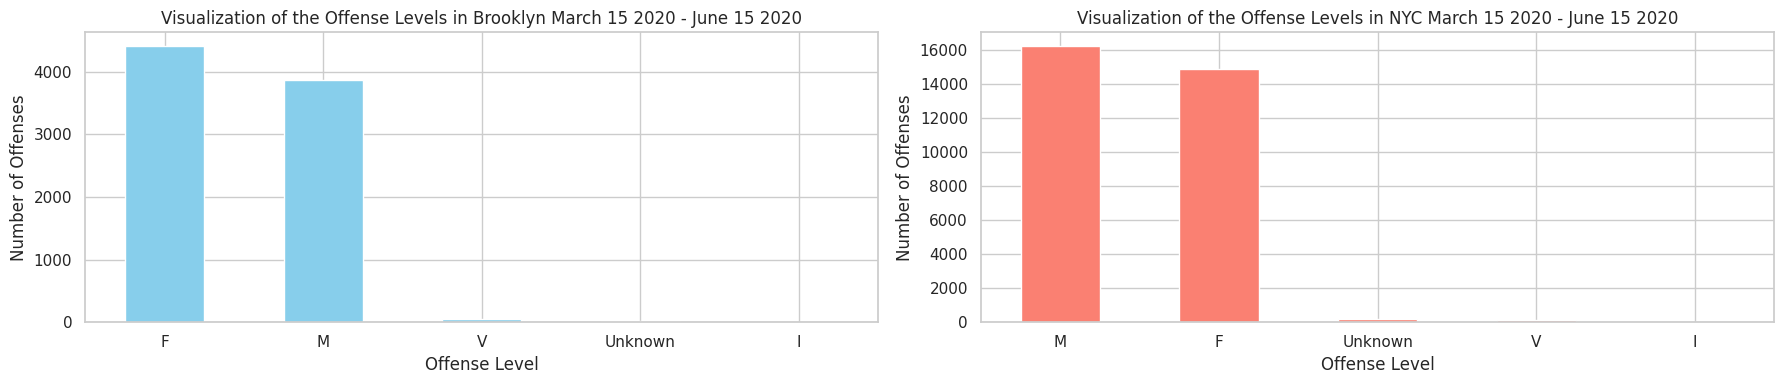

In [83]:
# Creating a bar chart

fig, axes = plt.subplots(1, 2, figsize=(18, 4))

brooklyn_ofns_dsc.plot(kind='bar', rot=0, ax=axes[0], color='skyblue') # Added color argument
axes[0].set_title('Visualization of the Offense Levels in Brooklyn March 15 2020 - June 15 2020')
axes[0].set_xlabel("Offense Level")
axes[0].set_ylabel("Number of Offenses")

total_ofns_dsc.plot(kind='bar', rot=0, ax=axes[1], color='salmon') # Added color argument
axes[1].set_title('Visualization of the Offense Levels in NYC March 15 2020 - June 15 2020')
axes[1].set_xlabel("Offense Level")
axes[1].set_ylabel("Number of Offenses")

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Making some more interesting visualizations

Showing the age breakdown of the offense types in Brooklyn.

In [84]:
#Trying to figure out how to do a group by of 2 variables
grouped_bk_ofns = brooklyn_df.groupby(['age_group', 'law_cat_cd'], as_index=False, observed=False)

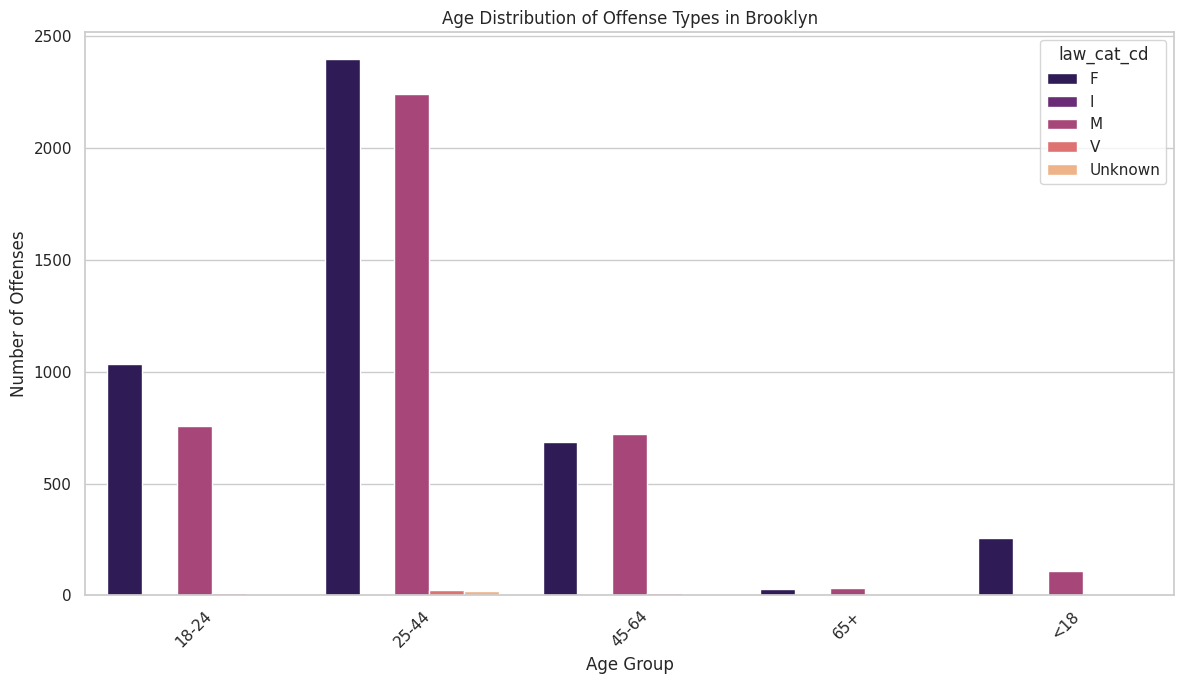

In [85]:
# Calculate the counts for each age_group and law_cat_cd combination
counts = grouped_bk_ofns.size().reset_index()
counts.rename(columns={'size': 'count'}, inplace=True)

plt.figure(figsize=(12, 7))
sns.barplot(x='age_group', y='count', hue='law_cat_cd', data=counts, palette='magma')
plt.title('Age Distribution of Offense Types in Brooklyn')
plt.xlabel('Age Group')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
#Wanting to see actual numbers because the 65+ visualization was too close to tell.
grouped_bk_ofns.size()

,age_group,law_cat_cd,size
0,18-24,F,1035
1,18-24,I,2
2,18-24,M,759
3,18-24,V,13
4,18-24,Unknown,3
5,25-44,F,2398
6,25-44,I,1
7,25-44,M,2244
8,25-44,V,24
9,25-44,Unknown,19


From this visualization we can see that the age group 25-44 had the highest number of offenses in Brooklyn and that in the 18-24, 25-44, and less than 18 age groups the highest number of offenses were felony offenses, meanwhile in the 45-64, and 65+ the highest number of offenses were misdemeanors.  

## Conclusion Statement

The data that I chose to examine is the NYPD Arrests Data from NYC Open Data that details arrests made in NYC between 03/15/2020 and 06/15/2020 so that I can understand the kinds of arrests that were being made during the Covid lockdown in NYC. What I found is that across NYC, the highest percentage of offenses were Misdemeanors but when looking specifically at Brooklyn the highest percentage of offenses were Felonies. Additionally, breaking the data down by age in Brooklyn we can see that 25-44 year olds had the highest number of offenses and the highest percentage of Felonies and Misdemeanors.

# Appendix

Visualizing some initial data about the Brooklyn Borough

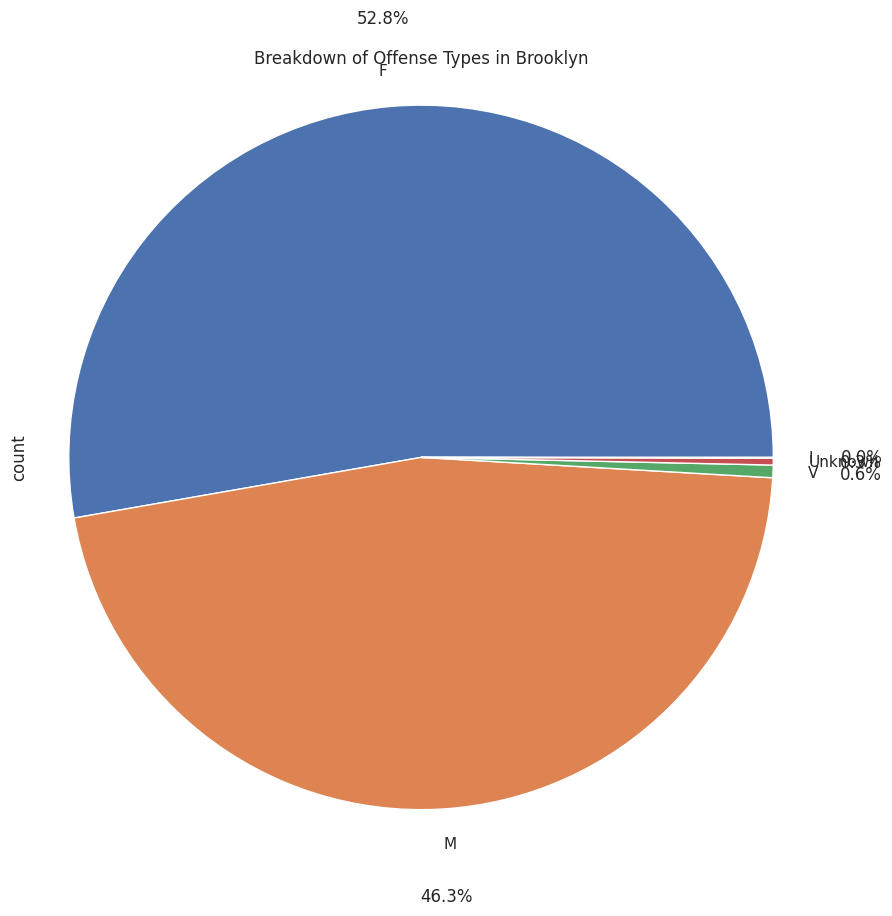

In [86]:
# Counts of Offense Descriptions in Brooklyn

brooklyn_ofns_dsc.plot.pie(
    y='count',
    figsize=(10, 10),       # Adjust figure size
    autopct='%1.1f%%',    # Add percentages to slices
    pctdistance=1.25,      # Increased pctdistance to move percentages further out
    # shadow=False,        # Removed shadow for a cleaner look
    title='Breakdown of Offense Types in Brooklyn' # Add a title
)

# Ensure the plot is displayed
plt.axis('equal') # Ensures the pie chart is drawn as a circle
plt.show()